In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
#data = pd.read_csv('/home/ai3/Desktop/common/ML/Day5/train.csv', header=None)
data = pd.read_csv("/home/ai3/Desktop/common/ML/Day5/train.csv",delimiter='\t')


In [13]:
data = data.as_matrix()

In [7]:
X=data[:,0:1]
y=data[:,2]

In [8]:
models= []
models.append(("KNN",KNeighborsClassifier()))
models.append(("LR",LogisticRegression()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC()))

In [9]:
results = []
names = []

In [10]:
for name,model in models:
    kfold = KFold(n_splits=10,random_state=7)
    v = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    results.append(v)
    names.append(name)
    print(name)
    print(v)

KNN
[ 0.75  0.5   1.    1.    0.75  1.    1.    0.75  1.    1.  ]
LR
[ 0.75        0.75        1.          1.          0.75        0.25        0.5
  0.25        0.66666667  0.66666667]
DT
[ 0.5         0.75        1.          1.          0.75        1.          1.
  1.          0.66666667  0.66666667]
NB
[ 0.75  0.5   1.    1.    0.75  1.    1.    1.    1.    1.  ]
SVM
[ 0.75  0.75  1.    1.    0.75  1.    1.    1.    1.    1.  ]


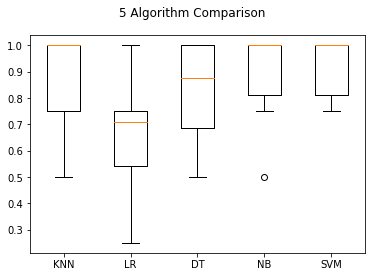

In [11]:
fig = plt.figure()
fig.suptitle('5 Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()